## Начало

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv("shift_ml_2025_train.csv")

/tmp/ipython-input-1466647184.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("shift_ml_2025_train.csv")


In [23]:
df.head()

,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,...,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам,особая_ситуация,тип_предоставления_кредита
0,68355089,1235000.0,3 года,11.99,41014.0,В,В1,инженер,10+ лет,ИПОТЕКА,...,7.7,0.0,0.0,15700850.0,1973750.0,3965000.0,1233350.0,NaN,Нет,Наличные
1,68341763,1000000.0,5 лет,10.78,21633.0,Б,Б4,водитель грузовика,10+ лет,ИПОТЕКА,...,50.0,0.0,0.0,10920900.0,934800.0,310000.0,743850.0,NaN,Нет,Наличные
2,68426831,597500.0,3 года,13.44,20259.0,В,В3,ветеринарный техник,4 года,АРЕНДА,...,100.0,0.0,0.0,845000.0,639900.0,470000.0,200000.0,NaN,Нет,Наличные
3,68476668,1000000.0,3 года,9.17,31879.0,Б,Б2,вице-президент операций по набору персонала,10+ лет,ИПОТЕКА,...,100.0,0.0,0.0,19442600.0,5838100.0,1575000.0,2322600.0,NaN,Нет,Наличные
4,67275481,1000000.0,3 года,8.49,31563.0,Б,Б1,дорожному водителю,10+ лет,ИПОТЕКА,...,0.0,0.0,0.0,9669500.0,1396850.0,725000.0,1807200.0,NaN,Нет,Наличные


In [24]:
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210779 entries, 0 to 1210778
Data columns (total 109 columns):
 #    Column                                                            Non-Null Count    Dtype  
---   ------                                                            --------------    -----  
 0    id                                                                1210779 non-null  int64  
 1    сумма_займа                                                       1210779 non-null  float64
 2    срок_займа                                                        1210779 non-null  object 
 3    процентная_ставка                                                 1210779 non-null  float64
 4    аннуитет                                                          1210779 non-null  float64
 5    рейтинг                                                           1210779 non-null  object 
 6    допрейтинг                                                        1210779 non-null  object 
 7  

<Axes: >

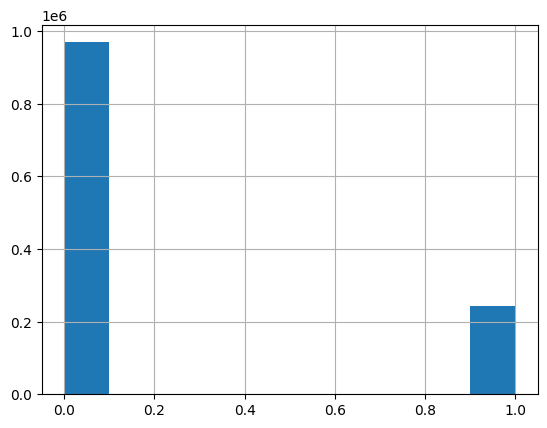

In [25]:
df.итоговый_статус_займа.hist()

Классы несбалансированны, это будет необходимо учесть при обучении модели

In [26]:
df.drop(columns='id', inplace=True)

col_to_drop = ['id']

## Рейтинг

Видим 5 признаков посвященных рейтингу, рассмотрим их подробнее

In [27]:
df['нижний_порог_рейтинга_заемщика'].corr(df['верхний_порог_рейтинга_заемщика'])

np.float64(0.9999999310632142)

Эти два признака линейнозависимы, удаляем один из них

In [28]:
print(df['нижний_порог_рейтинга_заемщика'].isnull().sum())
print(df['верхний_порог_рейтинга_заемщика'].isnull().sum())

0
0


Так как пропусков нет ни в одном из них удаляем любой

In [29]:
df.drop(columns='верхний_порог_рейтинга_заемщика', inplace=True)
col_to_drop.append('верхний_порог_рейтинга_заемщика')

In [30]:
print(df.рейтинг_OCR.unique())
print(df.рейтинг.unique())
print(df.допрейтинг.unique())

[4 2 3 1]
['В' 'Б' 'А' 'Д' 'Г' 'Е' 'Ж']
['В1' 'Б4' 'В3' 'Б2' 'Б1' 'А2' 'Б5' 'В2' 'Д2' 'А4' 'Д3' 'В5' 'А1' 'Г4'
 'Е3' 'В4' 'Г1' 'Б3' 'Г3' 'Г5' 'А5' 'Е2' 'Г2' 'Д4' 'Д1' 'Е5' 'Е1' 'Д5'
 'А3' 'Ж2' 'Ж1' 'Ж3' 'Ж4' 'Е4' 'Ж5']


In [31]:
(df['рейтинг'].str[0] == df['допрейтинг'].str[0]).all()

np.True_

Рейтинг дублирует информацию из допрейтинга, удаляем

In [32]:
df.drop(columns='рейтинг', inplace=True)

col_to_drop.append('рейтинг')

In [33]:
df.groupby('допрейтинг')['рейтинг_OCR'].unique()

,рейтинг_OCR
допрейтинг,
А1,"[1, 3, 2, 4]"
А2,"[2, 3, 4, 1]"
А3,"[1, 2, 3, 4]"
А4,"[2, 4, 1, 3]"
А5,"[3, 4, 2, 1]"
Б1,"[4, 2, 1, 3]"
Б2,"[1, 2, 3, 4]"
Б3,"[3, 2, 1, 4]"
Б4,"[2, 1, 3, 4]"


При этом допрейтинг не дублирует рейтинг_OCR

In [34]:
df.groupby('рейтинг_OCR')['нижний_порог_рейтинга_заемщика'].agg(['min', 'max'])

,min,max
рейтинг_OCR,,
1,660.0,845.0
2,630.0,845.0
3,625.0,845.0
4,660.0,845.0


In [35]:
df.groupby('допрейтинг')['нижний_порог_рейтинга_заемщика'].agg(['min', 'max'])

,min,max
допрейтинг,,
А1,660.0,845.0
А2,660.0,845.0
А3,660.0,845.0
А4,660.0,845.0
А5,660.0,845.0
Б1,660.0,845.0
Б2,660.0,845.0
Б3,660.0,845.0
Б4,660.0,845.0


Допрейтинг и рейтинг_OCR не определяются исходя из нижний_порог_рейтинга_заемщика, оставляем все эти признаки

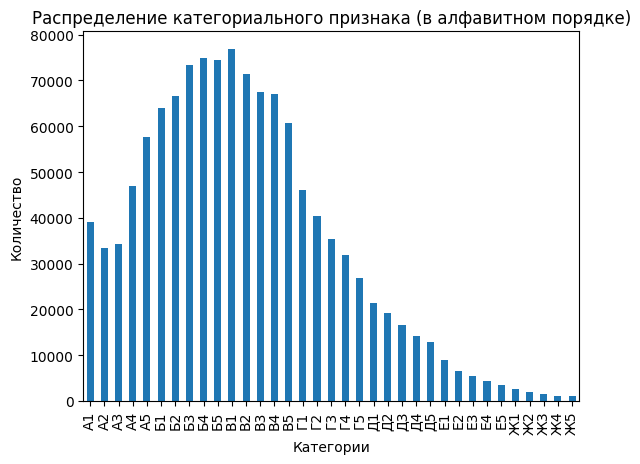

In [36]:
counts = df['допрейтинг'].value_counts()
counts = counts.sort_index()

counts.plot(kind='bar')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.title('Распределение категориального признака (в алфавитном порядке)')
plt.show()

Видим, что значения допрейтинга начинающиеся с Е и Ж встречаются крайне редко. Поэтому для таких объектов избавимся от цифры в рейтинге.

In [37]:
df['допрейтинг'] = df['допрейтинг'].apply(lambda x: x[0] if x[0] == 'Е' or x[0] == 'Ж' else x)

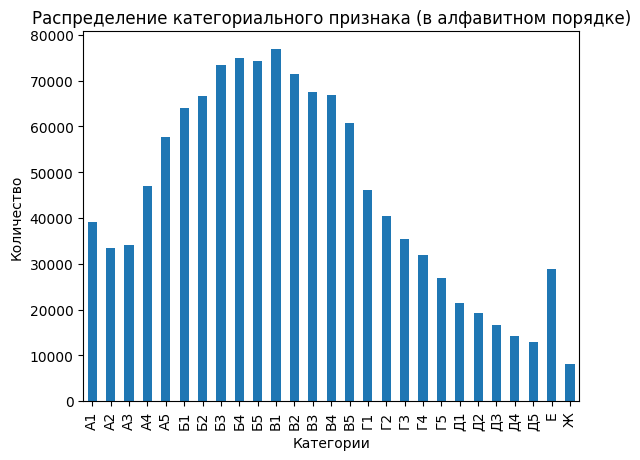

In [38]:
counts = df['допрейтинг'].value_counts()
counts = counts.sort_index()

counts.plot(kind='bar')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.title('Распределение категориального признака (в алфавитном порядке)')
plt.show()

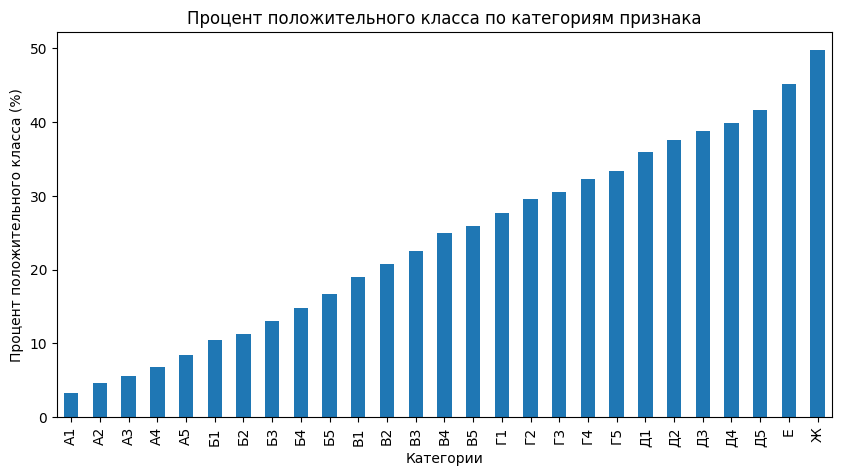

In [39]:
grouped = df.groupby('допрейтинг')['итоговый_статус_займа'].mean().sort_index() * 100

grouped.plot(kind='bar', figsize=(10,5))
plt.ylabel('Процент положительного класса (%)')
plt.xlabel('Категории')
plt.title('Процент положительного класса по категориям признака')
plt.show()

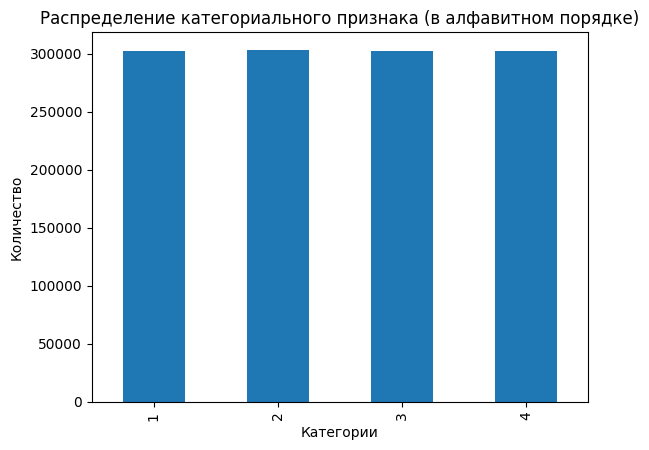

In [40]:
counts = df['рейтинг_OCR'].value_counts()
counts = counts.sort_index()

counts.plot(kind='bar')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.title('Распределение категориального признака (в алфавитном порядке)')
plt.show()

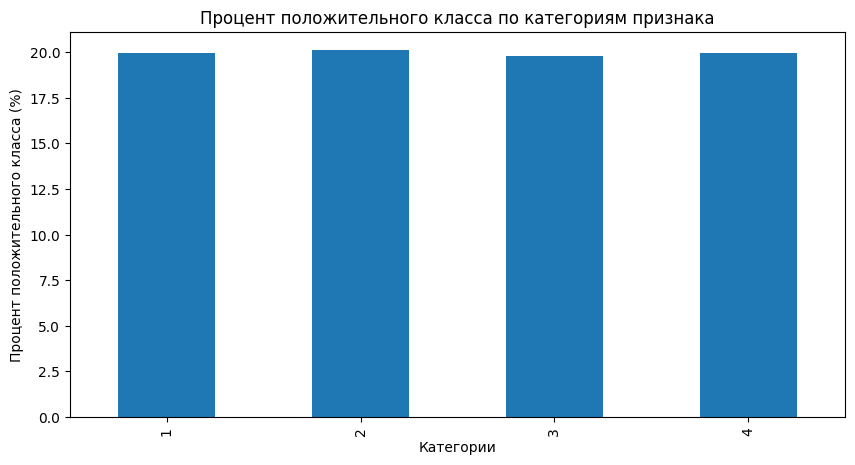

In [41]:
grouped = df.groupby('рейтинг_OCR')['итоговый_статус_займа'].mean().sort_index() * 100

grouped.plot(kind='bar', figsize=(10,5))
plt.ylabel('Процент положительного класса (%)')
plt.xlabel('Категории')
plt.title('Процент положительного класса по категориям признака')
plt.show()

Видим слабое влияние рейтинга OCR на целевую переменную, проведем тест на независимость, предполагая p-value равным 0.05.

In [42]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['рейтинг_OCR'], df['итоговый_статус_займа'])
chi2, p, _, _ = chi2_contingency(contingency)

print(f"Chi2: {chi2:.3f}, p-value: {p:.3f}")


Chi2: 8.685, p-value: 0.034


In [43]:
from scipy.stats import mannwhitneyu


group0 = df.loc[df['итоговый_статус_займа'] == 0, 'рейтинг_OCR']
group1 = df.loc[df['итоговый_статус_займа'] == 1, 'рейтинг_OCR']

stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')

print(f"U-statistic: {stat:.3f}")
print(f"P-value: {p_value:.3f}")

U-statistic: 117192649304.500
P-value: 0.583


Гипотеза о независимости отвергается, однако данный тест интерпретирует данный признак как категориальный. Если мы проведем U-тест гипотеза о независимости не будет отвергнута. Поэтому данный признак будет интерпретироваться

In [44]:
df['рейтинг_OCR'] = df['рейтинг_OCR'].astype(object)

## Признаки с одним значением

Признак дата_следующей_выплаты содержит только NaN, а значит может быть удалён

In [45]:
df.drop(columns='дата_следующей_выплаты', inplace=True)

col_to_drop.append('дата_следующей_выплаты')

Проверим есть ли другие признаки, которые содержат одно значение, и если есть, то удалим их

In [46]:
for col in df.columns:
  if len(df[col].unique()) == 1:
    df.drop(columns=col, inplace=True)
    print(col)
    col_to_drop.append(col)

платежный_график
коэфф_невыплаченного_сумм_остатка
непогашенная_сумма_из_тела_займов
код_политики
особая_ситуация


## Больше половины пропусков

In [47]:
missing_over_50 = df.isnull().mean()
missing_over_50 = missing_over_50[missing_over_50 > 0.5]

print(missing_over_50)

кол-во_месяцев_с_последней_просрочки                                0.504271
кол-во_месяцев_с_последнего_займа                                   0.830141
кол-во_месяцев_с_последнего_нарушения                               0.736815
совокупный_доход_заемщиков                                          0.980812
совокупный_пдн_заемщиков                                            0.980813
совокупный_статус_подтверждения_доходов_заемщиков                   0.980963
кол-во_открытых_счетов_за_полгода                                   0.600359
кол-во_текущих_аннуитетных_счетов                                   0.600358
кол-во_аннуитетных_счетов_за_год                                    0.600358
кол-во_аннуитетных_счетов_за_2_года                                 0.600358
кол-во_месяцев_с_посл_аннуитетного_счета                            0.610936
текущий_баланс_по_аннуитетным_счетам                                0.600358
соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам    0.654447

Видим, что есть признаки, больше половина значений которых - пропуски. Обработать такое количество пропусков не представляется возможным, поэтому удаляем их.

Однако среди них есть признаки:
* совокупный_доход_заемщиков
* совокупный_пдн_заемщиков
* совокупный_статус_подтверждения_доходов_заемщиков

In [48]:
df.тип_займа.unique()

array(['Индивидуальный', 'Совместный'], dtype=object)

In [49]:
df['совокупный_доход_заемщиков'].isnull().groupby(df['тип_займа']).mean()

,совокупный_доход_заемщиков
тип_займа,
Индивидуальный,1.0
Совместный,0.0


In [50]:
df['совокупный_пдн_заемщиков'].isnull().groupby(df['тип_займа']).mean()

,совокупный_пдн_заемщиков
тип_займа,
Индивидуальный,1.000000
Совместный,0.000086


In [51]:
df['совокупный_статус_подтверждения_доходов_заемщиков'].isnull().groupby(df['тип_займа']).mean()

,совокупный_статус_подтверждения_доходов_заемщиков
тип_займа,
Индивидуальный,1.000000
Совместный,0.007877


Эти признаки заполнены тогда, когда кредит совместный. Поэтому несмотря на количество пропусков мы оставляем их

In [52]:
filtered = missing_over_50[~missing_over_50.index.str.contains('совокупный', case=False)]
print(filtered)

кол-во_месяцев_с_последней_просрочки                                0.504271
кол-во_месяцев_с_последнего_займа                                   0.830141
кол-во_месяцев_с_последнего_нарушения                               0.736815
кол-во_открытых_счетов_за_полгода                                   0.600359
кол-во_текущих_аннуитетных_счетов                                   0.600358
кол-во_аннуитетных_счетов_за_год                                    0.600358
кол-во_аннуитетных_счетов_за_2_года                                 0.600358
кол-во_месяцев_с_посл_аннуитетного_счета                            0.610936
текущий_баланс_по_аннуитетным_счетам                                0.600358
соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам    0.654447
кол-во_возоб_счетов_за_год                                          0.600358
кол-во_возоб_счетов_за_2_года                                       0.600358
макс_баланс_по_возоб_счетам                                         0.600358

In [53]:
df.drop(columns=filtered.index, inplace=True)

col_to_drop.append(filtered.index)

## Линейно зависимые

In [54]:
corr_matrix = df.corr(numeric_only=True)

In [55]:
mask = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

high_corr_pairs = mask.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'].abs() > 0.9)]

print(high_corr_pairs)

                                  Feature 1                                        Feature 2  Correlation
1                               сумма_займа                                         аннуитет     0.953378
764                  кол-во_открытых_счетов                      кол-во_счетов_без_нарушений     0.998728
1319                  общая_сумма_на_счетах                                  кредитный_лимит     0.973319
1768  кол-во_активных_возобновляемых_счетов  кол-во_возобновляемых_счетов_с_балансом_более_0     0.982031


Настолько связанные друг с другом признаки добавляют в данные лишний шум, от которого лучше избавиться. Удалив из каждой пары по признаку. Удалять будем те, где больше пропусков в данных

In [56]:
for _, row in high_corr_pairs.iterrows():
        f1, f2 = row['Feature 1'], row['Feature 2']

        f1_na = df[f1].isnull().sum()
        f2_na = df[f2].isnull().sum()

        if f1_na > f2_na:
            df.drop(columns=f1, inplace = True)
            col_to_drop.append(f1)
        else:
            df.drop(columns=f2, inplace = True)
            col_to_drop.append(f2)

## Признаки с типом object

In [57]:
df.describe(include=['object'])

,срок_займа,допрейтинг,профессия_заемщика,стаж,владение_жильем,подтвержден_ли_доход,рейтинг_OCR,цель_займа,регион,пос_стоп_фактор,юридический_статус,дата_первого_займа,первоначальный_статус_займа,пени_за_дефолт,тип_займа,совокупный_статус_подтверждения_доходов_заемщиков,тип_предоставления_кредита
count,1210779,1210779,1133730,1140271,1210779,1210779,1210779,1210779,1210779,1210779,1210779,1210779,1210779,847338,1210779,23050,1210779
unique,2,27,273666,11,6,3,4,14,51,3,2,738,2,2,2,3,2
top,3 года,В1,менеджер,10+ лет,ИПОТЕКА,Подтвержден источник,2,консолидация_долга,Московская область,Нет,Нет,8-2001,а,False,Индивидуальный,Не подтвержден,Наличные
freq,918586,76885,23291,398214,598993,468878,303264,702475,177023,1089579,968854,8407,705688,735956,1187546,13380,1204573


In [58]:
df.срок_займа.unique()

array(['3 года', '5 лет'], dtype=object)

Срок займа это число, записанное в виде строки. Нужно преобразовать его в число. В примерах записано в число лет, но в других примерах (например, в тестовой выборке) может быть записано число месяцев, учитывая это преобразуем столбец.

In [59]:
import re

def parse_loan_term(text):
    text = str(text).lower()
    years = months = weeks = 0

    match = re.search(r'(\d+)\s*(год|года|лет)', text)
    if match:
        years = int(match.group(1))

    match = re.search(r'(\d+)\s*(месяц|месяца|месяцев)', text)
    if match:
        months = int(match.group(1))

    return years + months / 12

df['срок_займа'] = df['срок_займа'].apply(parse_loan_term)

In [60]:
df.профессия_заемщика.value_counts()[:100].sum() /len(df)

np.float64(0.26251363791410326)

Признак профессия_заемщика содержит слишком много уникальных значений для того чтобы применить к ней OHE. При этом там нет отношения порядка (нельзя заменить на одно число). Даже 100 самых распространненых профессий покрывают лишь 26 процентов всех записей (нельзя объеденить редкие профессии в одну категорию). Поэтому удалим этот признак, при этом информация, связанная с профессией, частично сохраняется за счёт признаков стаж и годовой_доход.

In [61]:
df.drop(columns="профессия_заемщика", inplace=True)

col_to_drop.append('профессия_заемщика')

In [62]:
df.стаж.unique()

array(['10+ лет', '4 года', '6 лет', '3 года', '7 лет', '8 лет', '2 года',
       '5 лет', '9 лет', '< 1 года', '1 год', nan], dtype=object)

Признак стаж тоже лучше преобразовать в число, однако помимо чисел тут есть и менее конкретные значения. Которые мы заменим на оценки

In [63]:
def parse_experience(x):
    if pd.isna(x):
        return None
    if x == '< 1 года':
        return 0.5
    elif x == '10+ лет':
        return 10.0
    else:
        match = re.search(r'(\d+)', x)
        return float(match.group(1)) if match else None

df['стаж'] = df['стаж'].apply(parse_experience)

In [64]:
df.дата_первого_займа.head()

,дата_первого_займа
0,12-1999
1,8-2000
2,10-1987
3,6-1990
4,2-1999


Чтобы модель смогда обработать этот признак он тоже должен быть преобразован, однако вместо простого преобразования в datatime после этого лучше отнять полученное значение от максимального datatime в столбце. Так модель сможет оценивать возраст первого займа.

In [65]:
df['дата_первого_займа'] = pd.to_datetime(df['дата_первого_займа'], format='%m-%Y', errors='coerce')

base_date = df['дата_первого_займа'].max()

df['возраст_займа_дней'] = (base_date - df['дата_первого_займа']).dt.days

df.drop(columns='дата_первого_займа', inplace=True)

col_to_drop.append('дата_первого_займа')

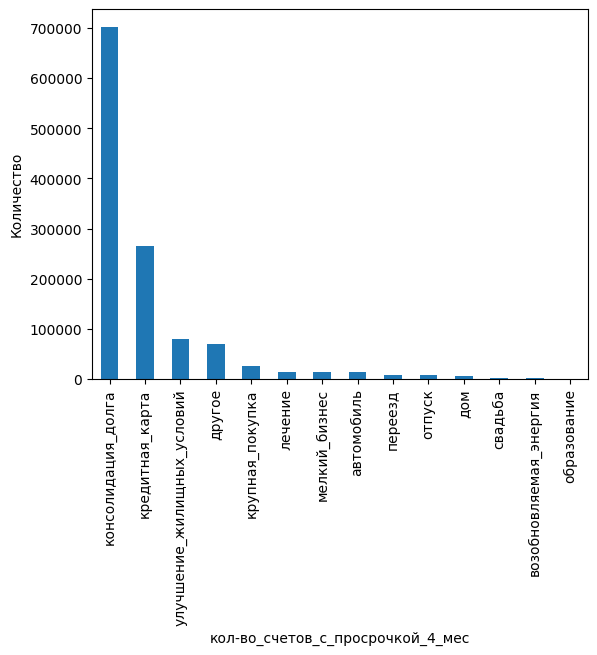

In [66]:
counts = df['цель_займа'].value_counts()

counts.plot(kind='bar')
plt.xlabel('кол-во_счетов_с_просрочкой_4_мес')
plt.ylabel('Количество')
plt.show()

Видим много категорий, которые встречаются крайне редко, объеденим такие, стараясь не потерять смысл

In [67]:
mapping = {
    'дом': 'жильё',
    'улучшение_жилищных_условий': 'жильё',
    'крупная_покупка': 'крупные_покупки',
    'автомобиль': 'крупные_покупки',
    'отпуск': 'личные_цели',
    'свадьба': 'личные_цели',
    'лечение': 'личные_цели',
    'образование': 'личные_цели',
    'переезд': 'личные_цели',
    'другое': 'прочее',
    'возобновляемая_энергия': 'прочее'
}

In [68]:
df['цель_займа'] = df['цель_займа'].replace(mapping)

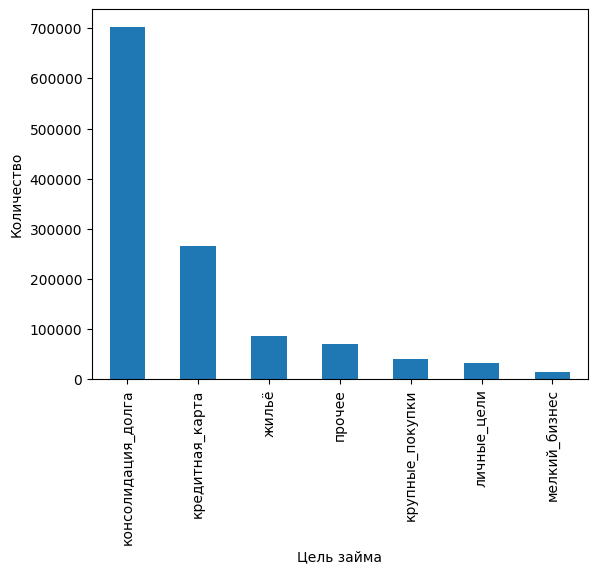

In [69]:
counts = df['цель_займа'].value_counts()

counts.plot(kind='bar')
plt.xlabel('Цель займа')
plt.ylabel('Количество')
plt.show()

In [70]:
target = 'итоговый_статус_займа'

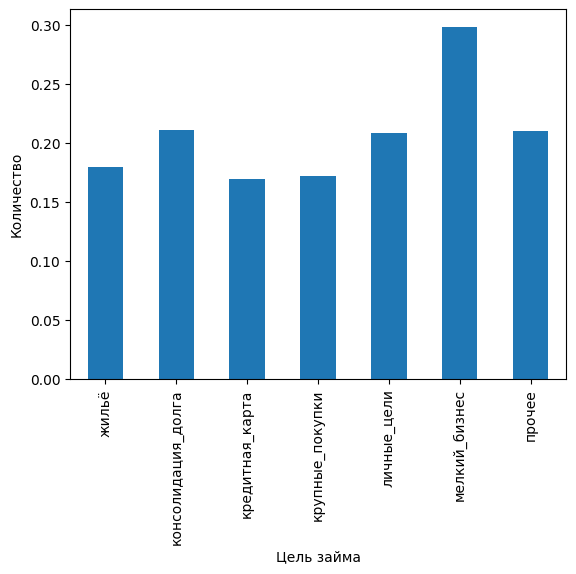

In [71]:
counts = df.groupby('цель_займа')[target].mean()

counts.plot(kind='bar')
plt.xlabel('Цель займа')
plt.ylabel('Количество')
plt.show()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210779 entries, 0 to 1210778
Data columns (total 75 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   сумма_займа                                        1210779 non-null  float64
 1   срок_займа                                         1210779 non-null  float64
 2   процентная_ставка                                  1210779 non-null  float64
 3   допрейтинг                                         1210779 non-null  object 
 4   стаж                                               1140271 non-null  float64
 5   владение_жильем                                    1210779 non-null  object 
 6   годовой_доход                                      1210779 non-null  float64
 7   подтвержден_ли_доход                               1210779 non-null  object 
 8   итоговый_статус_займа                              1210779 non

In [73]:
df.drop(columns='индекс_проживания', inplace=True)

col_to_drop.append('индекс_проживания')

Регион заемщика определяется признаком регион. А данный признак избыточен

Есть признаки:
        

1.    кол-во просрочек за два года
2.    кол-во текущих просроченных счетов
3.    кол-во счетов с просрочкой 4 мес
4.    кол-во счетов с акт просрочкой 4 мес обн 2 мес
5.    кол-во счетов с акт просрочкой 1 мес
6.    кол-во счетов с акт просрочкой 3 мес за 2 года
7.    процент счетов без просрочек

Данные признаки крайне похожи по смыслу. Они избыточны, что может приводить к шуму в данных и переобучению модели. Лучше объеденить их в один признак.

Сформулируем утверждение: если хотя бы один из признаков 1-6 больше 0, то признак 7 меньше 100.

In [74]:
cols = [
        'кол-во_просрочек_за_два_года',
        'кол-во_текущих_просроченных_счетов',
        'кол-во_счетов_с_просрочкой_4_мес',
        'кол-во_счетов_с_акт_просрочкой_4_мес_обн_2_мес',
        'кол-во_счетов_с_акт_просрочкой_1_мес',
        'кол-во_счетов_с_акт_просрочкой_3_мес_за_2_года'
        ]

df_sub = df[(df[cols] > 0).any(axis=1)]
violations = (df_sub['процент_счетов_без_просрочек'] >= 100).sum()

print(violations/len(df_sub))

0.027704364157372985


Утверждение нарушается всего в двух процентах случаев и процент_счетов_без_просрочек выбирается как наиболее полезный из данных признаков. Остальные удаляются. Однако для удобства переделаем процент_счетов_без_просрочек в процент_просроченных_счетов

In [75]:
df['процент_просроченных_счетов'] = 100 - df['процент_счетов_без_просрочек']

df.drop(columns=cols, inplace=True)
col_to_drop.append(cols)

df.drop(columns='процент_счетов_без_просрочек', inplace=True)
col_to_drop.append('процент_счетов_без_просрочек')

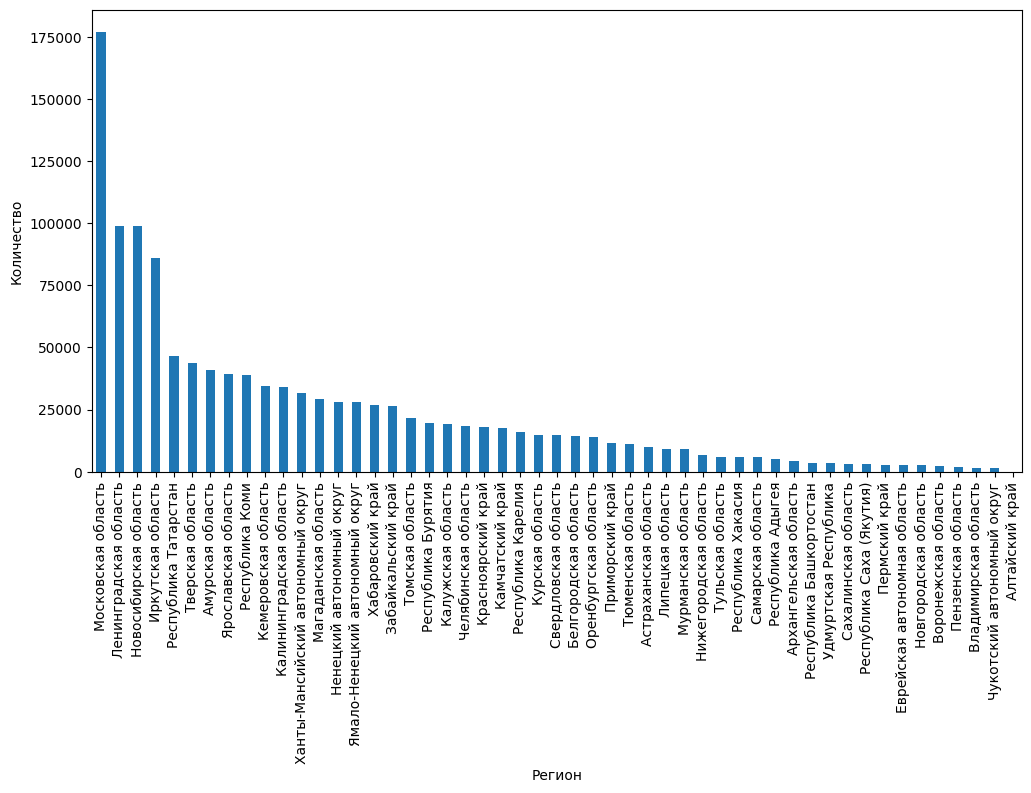

In [76]:
counts = df['регион'].value_counts()

plt.figure(figsize=(12,6))
counts.plot(kind='bar')
plt.xlabel('Регион')
plt.ylabel('Количество')
plt.show()

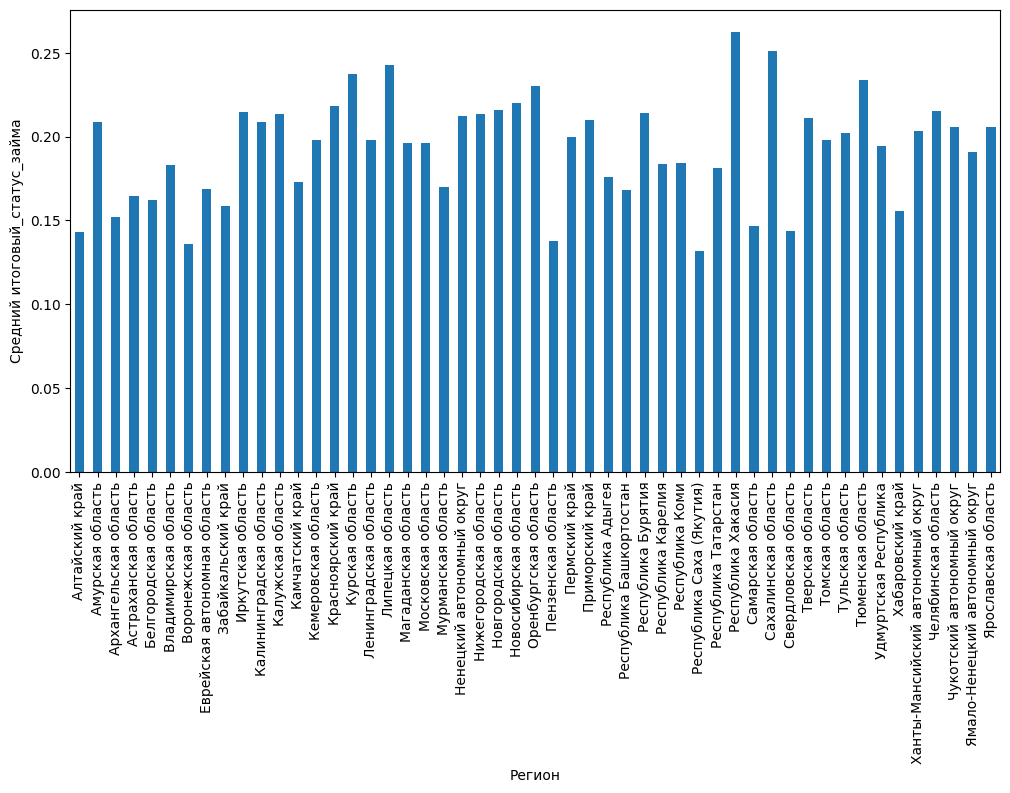

In [77]:
counts = df.groupby('регион')['итоговый_статус_займа'].mean()

plt.figure(figsize=(12,6))
counts.plot(kind='bar')
plt.xlabel('Регион')
plt.ylabel('Средний итоговый_статус_займа')
plt.show()

Видим, что регион оказывает существенное влияние на целевую переменную, однако преобразование с помощью OHE сделает матрицу признаков разреженной. Следует  использовать Target Encoding

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210779 entries, 0 to 1210778
Data columns (total 68 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   сумма_займа                                        1210779 non-null  float64
 1   срок_займа                                         1210779 non-null  float64
 2   процентная_ставка                                  1210779 non-null  float64
 3   допрейтинг                                         1210779 non-null  object 
 4   стаж                                               1140271 non-null  float64
 5   владение_жильем                                    1210779 non-null  object 
 6   годовой_доход                                      1210779 non-null  float64
 7   подтвержден_ли_доход                               1210779 non-null  object 
 8   итоговый_статус_займа                              1210779 non

## Слабое влияние на целевое значение

Рассмотрим числовые признаки, имеющие наименьшее влияние на целевую переменную.

Для отбора таковых используем U-тест

In [79]:
target = 'итоговый_статус_займа'

numeric_features = df.select_dtypes(include=[np.number]).columns.drop(target)

In [80]:
selected_features_u_test = []

for col in numeric_features:
    series = df[col].dropna()

    group0 = series[df[target] == df[target].unique()[0]]
    group1 = series[df[target] == df[target].unique()[1]]
    stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')
    if p_value > 0.05:
        selected_features_u_test.append(col)


print(selected_features_u_test)

['коэфф_акционных_зачислений_в_остатке', 'кол_во_субсидий_за_год', 'коэфф_исходного_платежа', 'возвраты_с_учетом_мпл', 'кол-во_аннуитетных_счетов']


Опишем функции для визуализации

In [81]:
def print_hist(series):
    counts = series.value_counts()
    counts.plot(kind='bar')
    plt.xlabel(series.name)
    plt.ylabel('Количество')
    plt.title(f'Распределение признака {series.name}')
    plt.show()

def print_target_hist(series, discrete, bins, xticks=False):
    if discrete:
        counts = df.groupby(series)[target].mean()
        counts.plot(kind='bar')
        plt.xlabel(series.name)
        plt.ylabel(f'Среднее значение {target}')
        plt.title(f'Зависимость {target} от {series.name}')
        plt.show()
    else:
        feature_bins = pd.cut(series, bins=bins, include_lowest=True)
        grouped = df.groupby(feature_bins)[target].mean()
        plt.figure(figsize=(8,5))
        grouped.plot(kind='bar')
        plt.xlabel(f'Интервалы {series.name}')
        plt.ylabel(f'Среднее значение {target}')
        plt.title(f'Зависимость {target} от {series.name}')
        if not xticks:
            plt.xticks([])
        else:
            plt.xticks(rotation=45)
        plt.show()


С помощью визуализации подробнее рассмотрим данные признаки

/tmp/ipython-input-1824722149.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature_bins)[target].mean()


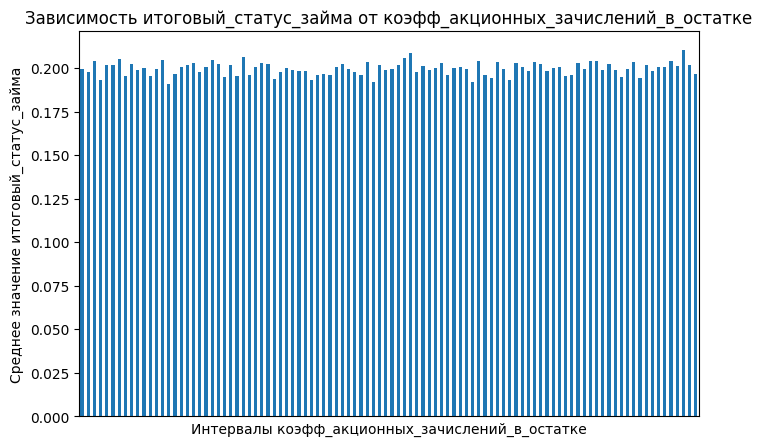

In [82]:
bins = np.arange(0, 1.01, 0.01)
print_target_hist(df['коэфф_акционных_зачислений_в_остатке'], False, bins, xticks=False)

In [83]:
df.drop(columns ='коэфф_акционных_зачислений_в_остатке', inplace = True)

col_to_drop.append('коэфф_акционных_зачислений_в_остатке')

In [84]:
df.кол_во_субсидий_за_год.unique()

array([0, 1, 5, 2, 4, 3])

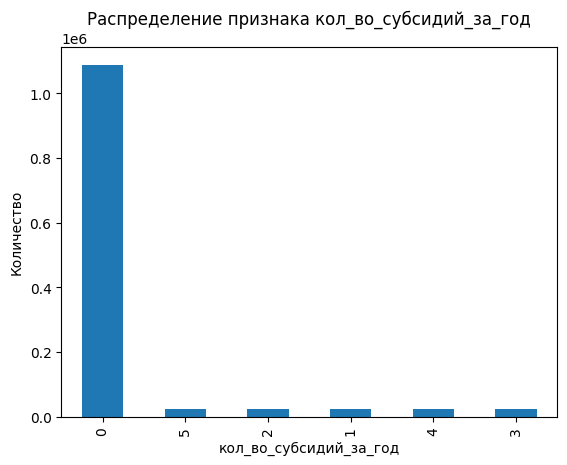

In [85]:
print_hist(df['кол_во_субсидий_за_год'])

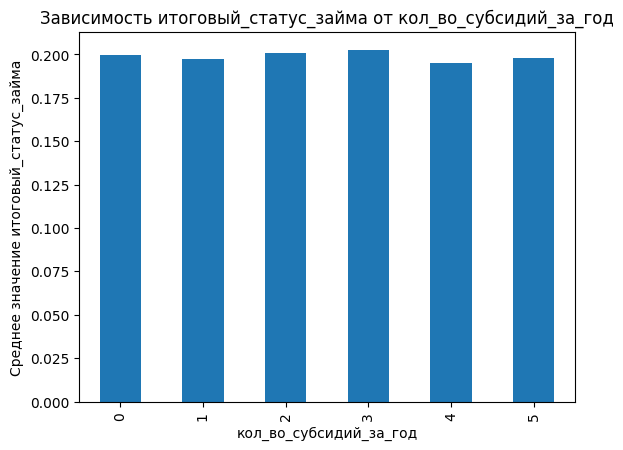

In [86]:
print_target_hist(df['кол_во_субсидий_за_год'], True, bins)

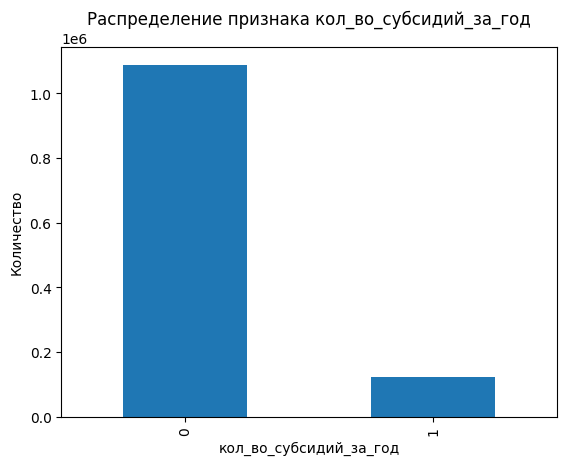

In [87]:
print_hist(df.кол_во_субсидий_за_год.apply(lambda x: 0 if x == 0 else 1))

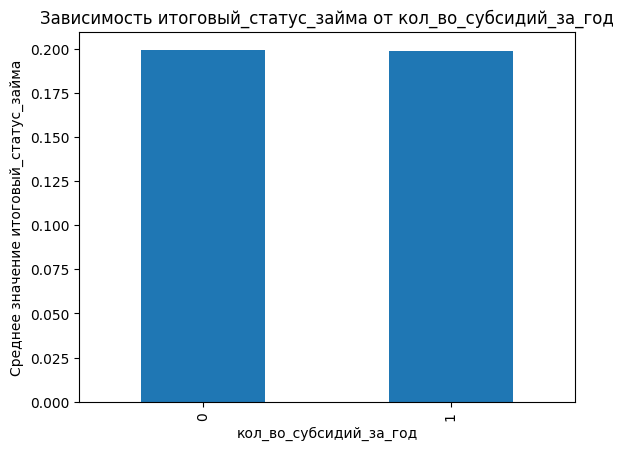

In [88]:
print_target_hist(df['кол_во_субсидий_за_год'].apply(lambda x: 0 if x == 0 else 1), True, [])

In [89]:
df.drop(columns='кол_во_субсидий_за_год', inplace=True)

col_to_drop.append('кол_во_субсидий_за_год')

<Axes: >

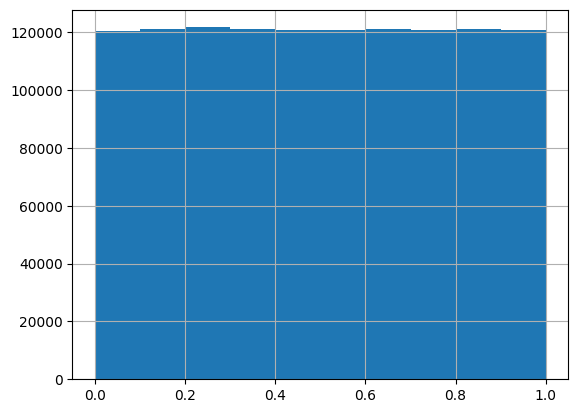

In [90]:
df.коэфф_исходного_платежа.hist()

/tmp/ipython-input-1824722149.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature_bins)[target].mean()


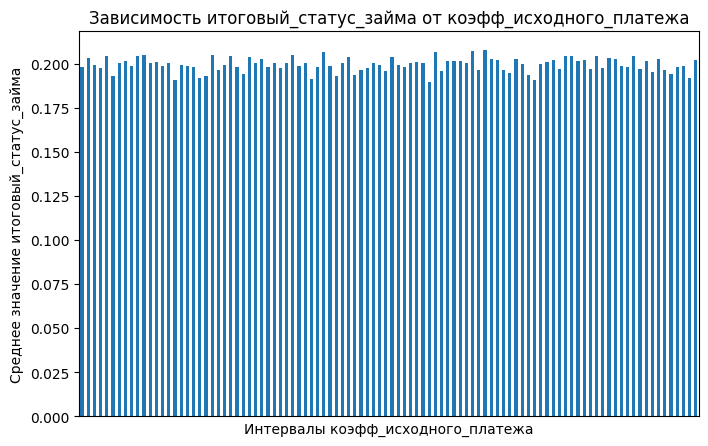

In [91]:
bins = np.arange(0, 1.01, 0.01)
print_target_hist(df['коэфф_исходного_платежа'], False, bins, False)

In [92]:
df.drop(columns='коэфф_исходного_платежа', inplace=True)

col_to_drop.append('коэфф_исходного_платежа')

<Axes: >

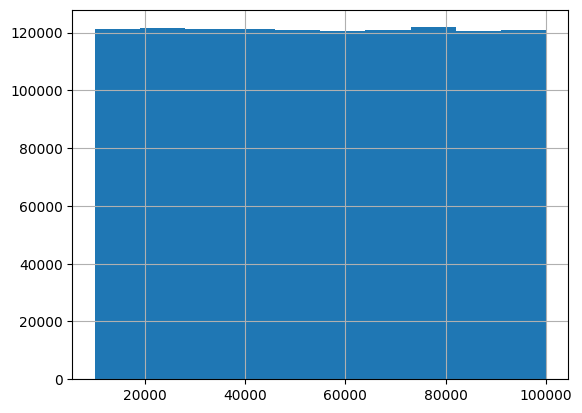

In [93]:
df.возвраты_с_учетом_мпл.hist()

/tmp/ipython-input-1824722149.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature_bins)[target].mean()


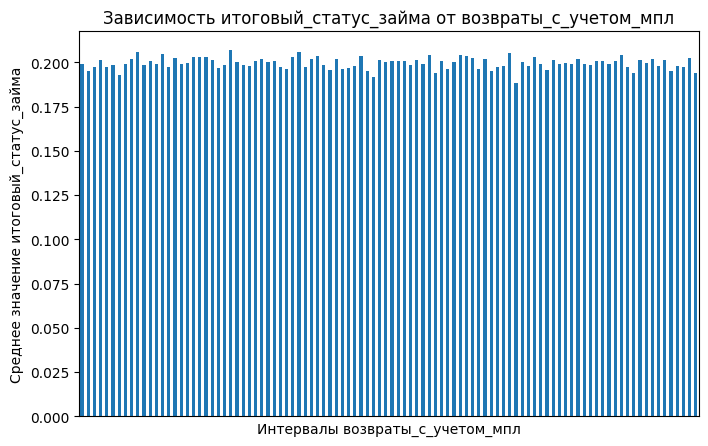

In [94]:
bins = np.arange(df.возвраты_с_учетом_мпл.min() - 1, df.возвраты_с_учетом_мпл.max() + 1,
                 (df.возвраты_с_учетом_мпл.max() - df.возвраты_с_учетом_мпл.min()) / 100 )

print_target_hist(df['возвраты_с_учетом_мпл'], False, bins, False)

In [95]:
df.drop(columns='возвраты_с_учетом_мпл', inplace=True)

col_to_drop.append('возвраты_с_учетом_мпл')

<Axes: >

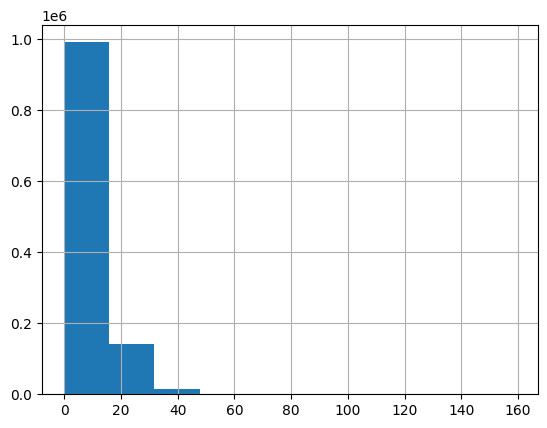

In [96]:
df['кол-во_аннуитетных_счетов'].hist()

In [97]:
df['кол-во_аннуитетных_счетов'].unique()

array([  6.,   2.,   7.,   9.,   3.,   5.,   4.,   8.,   1.,  10.,  12.,
        17.,  15.,  14.,  39.,  25.,  35.,  19.,  26.,  13.,  16.,   0.,
        28.,  21.,  24.,  11.,  36.,  59.,  31.,  27.,  29.,  18.,  22.,
        20.,  23.,  44.,  45.,  30.,  38.,  41.,  34.,  40.,  32.,  43.,
        33.,  51.,  52.,  46.,  48.,  62.,  49.,  55.,  42.,  57.,  47.,
        37.,  60.,  53.,  54.,  72.,  50.,  80.,  56.,  89.,  86.,  61.,
        75.,  65.,  74.,  66.,  64.,  58.,  82.,  99.,  98.,  63.,  67.,
       104.,  68.,  69.,  73.,  83., 101.,  70.,  77., 117.,  96.,  71.,
       118., 132.,  79.,  76.,  85.,  93.,  78.,  84.,  88., 107.,  81.,
        97.,  91., 159., 128.,  94.,  90., 121.,  87., 110., 150.,  nan,
       109., 138., 113.])

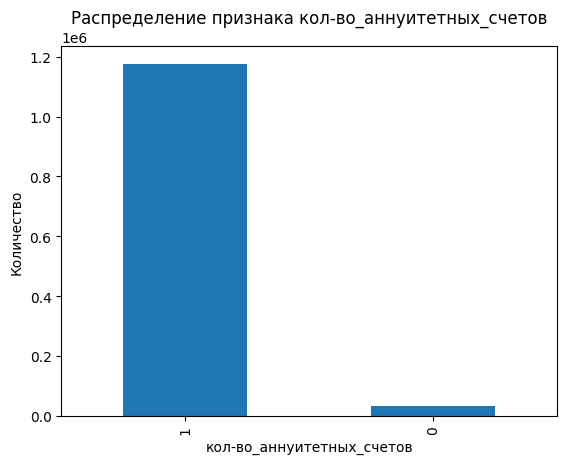

In [98]:
print_hist(df['кол-во_аннуитетных_счетов'].apply(lambda x: 0 if x == 0 else 1))

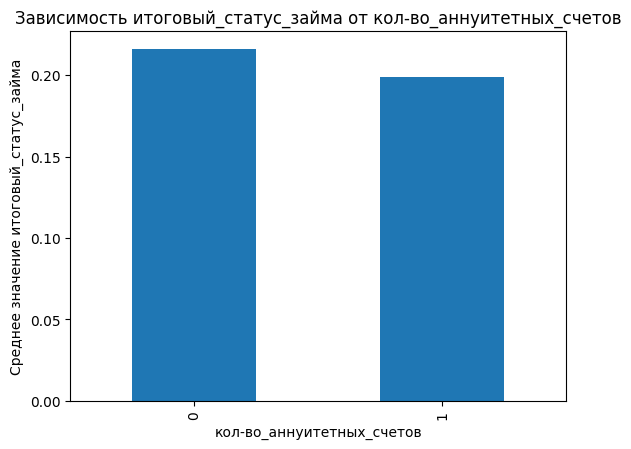

In [99]:
print_target_hist(df['кол-во_аннуитетных_счетов'].apply(lambda x: 0 if x == 0 else 1), True, [])

In [100]:
df['кол-во_аннуитетных_счетов'] = df['кол-во_аннуитетных_счетов'].apply(lambda x: 0 if x == 0 else 1)

In [101]:
from scipy.stats import mannwhitneyu


group0 = df.loc[df['итоговый_статус_займа'] == 0, 'кол-во_аннуитетных_счетов']
group1 = df.loc[df['итоговый_статус_займа'] == 1, 'кол-во_аннуитетных_счетов']

stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')

print(f"U-statistic: {stat:.3f}")
print(f"P-value: {p_value:.3f}")

U-statistic: 117453962725.000
P-value: 0.000


После преобразования значение данного признака начинает статистически значимо влиять на распределение целевую переменную

## Ассиметричные признаки

In [102]:
from scipy.stats import skew

selected_features_skew = []

for col in numeric_features:
    if col not in selected_features_u_test:
        series = df[col].dropna()

        skewness = skew(series)

        if abs(skewness) > 1:
            selected_features_skew.append(col)

print(selected_features_skew)

['срок_займа', 'годовой_доход', 'пдн', 'нижний_порог_рейтинга_заемщика', 'кол-во_заявок_за_полгода', 'кол-во_открытых_счетов', 'кол-во_записей_в_общедоступных_документах', 'оборотный_баланс', 'сумма_выплат_по_просрочкам', 'кол-во_взысканий_за_последний_год', 'совокупный_доход_заемщиков', 'общая_сумма_взысканий', 'общая_сумма_на_счетах', 'общий_лимит_по_возоб_счету', 'кол-во_открытых_счетов_за_2_года', 'средний_баланс_текущих_счетов', 'суммарная_доступная_сумма_займа_по_картам', 'кол-во_списаний_за_год', 'сумма_задолженности', 'кол-во_месяцев_с_первого_возобновляемого_счета', 'кол-во_месяцев_с_последнего_возобновляемого_счета', 'кол-во_месяцев_с_последнего_счета', 'кол-во_ипотек', 'кол-во_месяцев_с_последней_карты', 'кол-во_активных_карт', 'кол-во_активных_возобновляемых_счетов', 'кол-во_карт_без_нарушений', 'кол-во_карт', 'кол-во_открытых_возобновляемых_счетов', 'кол-во_возобновляемых_счетов', 'кол-во_счетов_за_посл_год', 'кол-во_публ_банкротств', 'кол-во_залогов', 'кредитный_баланс_бе

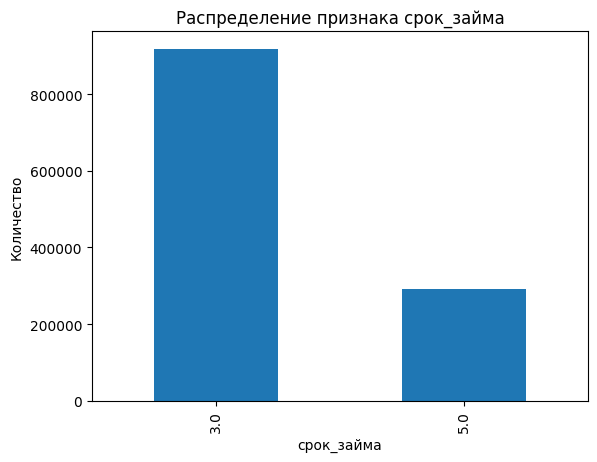

In [103]:
print_hist(df.срок_займа)

<Axes: >

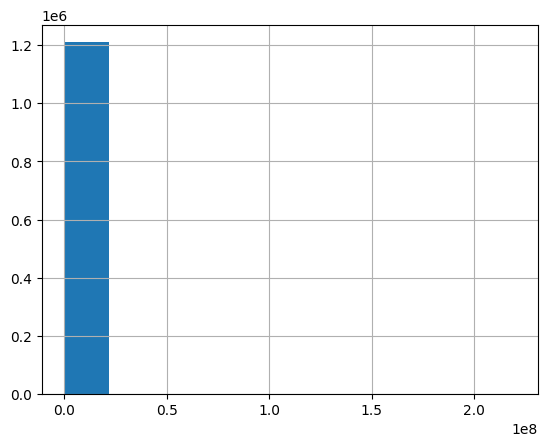

In [104]:
df.годовой_доход.hist()

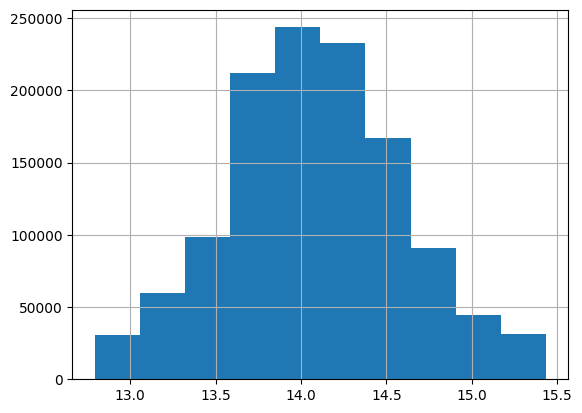

In [105]:
transform_log = []

lower = df['годовой_доход'].quantile(0.01)
upper = df['годовой_доход'].quantile(0.99)

filtered_income = df['годовой_доход'].clip(lower=lower, upper=upper)

np.log(filtered_income + 1).hist()

transform_log.append({
            'col': 'годовой_доход',
            'lower': lower,
            'upper': upper,
        })

In [106]:
df.годовой_доход = np.log(filtered_income + 1)

In [107]:
selected_features_skew.remove('годовой_доход')

In [108]:
selected_features_skew.remove('срок_займа')

Подобные преобразования разумно применять только к непрерывным значениям. Но в dtypes все численные признаки имеют тип float64. Чтобы выделить среди них дискретные напишем функцию, которая определит это.

In [109]:
# Будем считать, что если в признаке меньше 15 уникальных значений то оно дискретное
def is_discrete_series(series):
    return series.nunique() < 15

Отделим дискретные признаки от непрерывных

In [110]:
discrete_skew = []

for col in selected_features_skew:
    if is_discrete_series(df[col]):
        discrete_skew.append(col)

print(discrete_skew)

['кол-во_заявок_за_полгода', 'кол-во_списаний_за_год', 'кол-во_публ_банкротств']


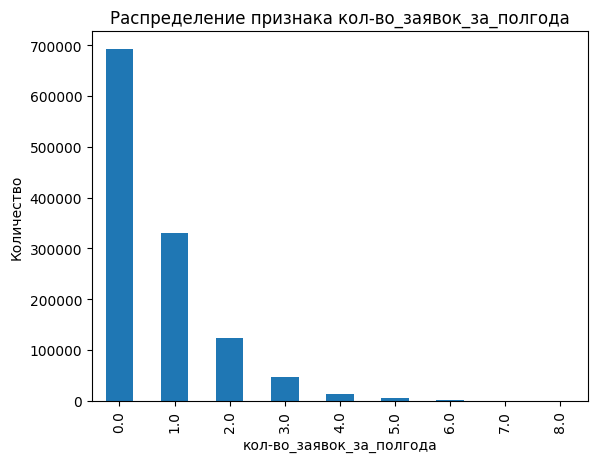

In [111]:
print_hist(df['кол-во_заявок_за_полгода'])

Значения большие, чем 4, встречаются крайне редко и мы обрезаем их до 4

In [112]:
df['кол-во_заявок_за_полгода'] = df['кол-во_заявок_за_полгода'].clip(upper=4)

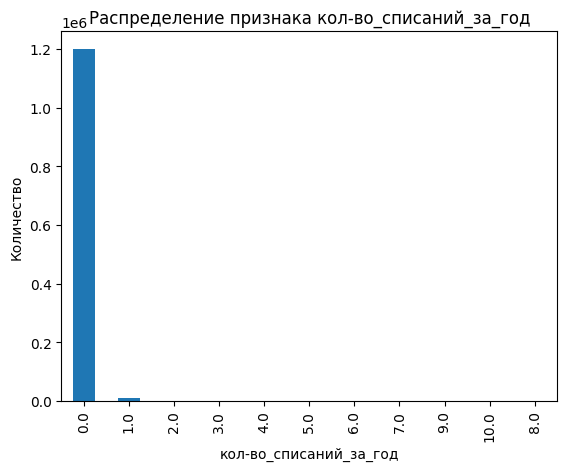

In [113]:
print_hist(df['кол-во_списаний_за_год'])

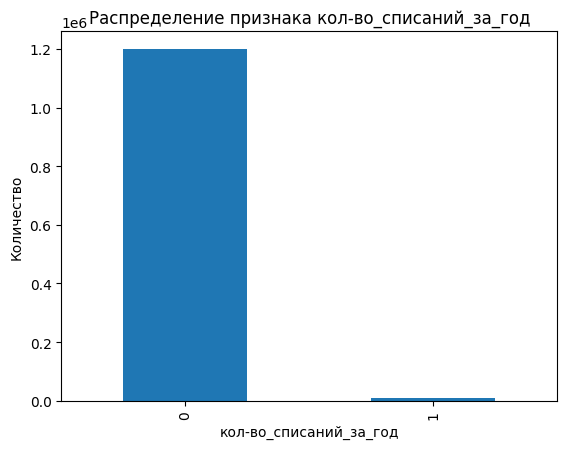

In [114]:
print_hist(df['кол-во_списаний_за_год'].apply(lambda x: 0 if x == 0 else 1))

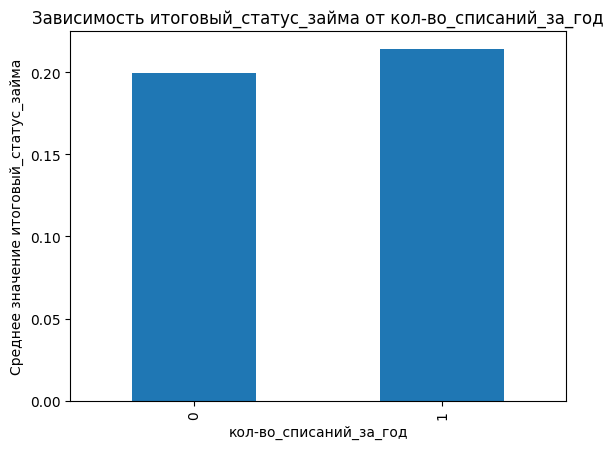

In [115]:
print_target_hist(df['кол-во_списаний_за_год'].apply(lambda x: 0 if x == 0 else 1), True, [])

Видим влияние признака на целевую переменную. Поэтому оставим его.

In [116]:
df['кол-во_списаний_за_год'] = df['кол-во_списаний_за_год'].apply(lambda x: 0 if x == 0 else 1)

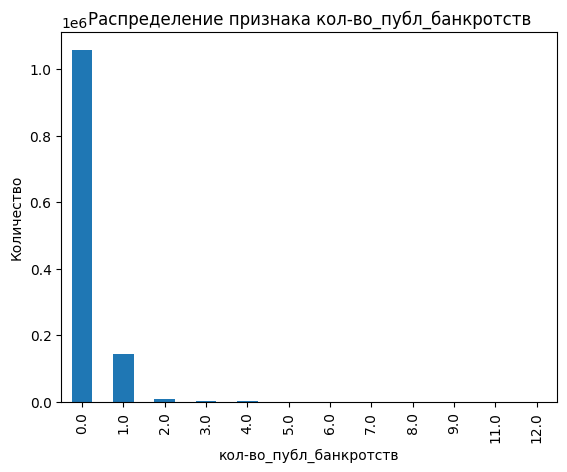

In [117]:
print_hist(df['кол-во_публ_банкротств'])

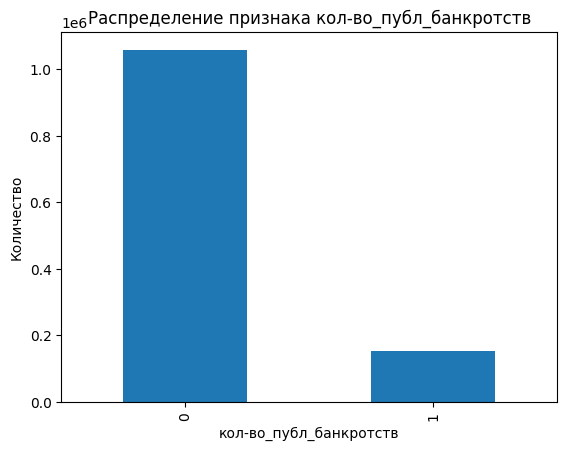

In [118]:
print_hist(df['кол-во_публ_банкротств'].apply(lambda x: 0 if x == 0 else 1))

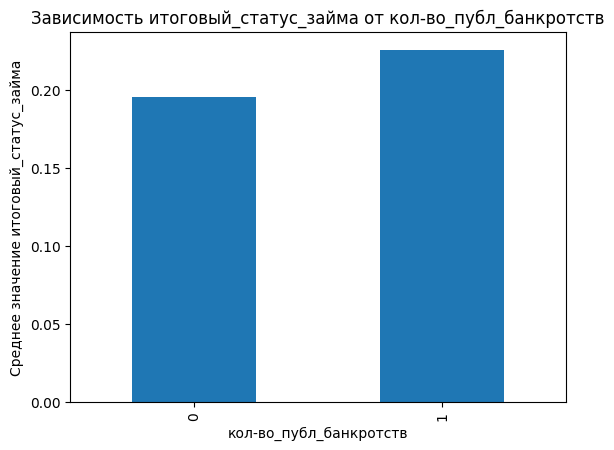

In [119]:
print_target_hist(df['кол-во_публ_банкротств'].apply(lambda x: 0 if x == 0 else 1), True, [])

Аналогично с предыдущим признаком

In [120]:
df['кол-во_публ_банкротств']= df['кол-во_публ_банкротств'].apply(lambda x: 0 if x == 0 else 1)

Применим отсечение выбросов и логарифмирование непрерывных числовых значений

In [121]:
for col in selected_features_skew:
    if col not in discrete_skew:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)

        df[col] = np.log(df[col].clip(lower=lower, upper=upper) + 1)

        transform_log.append({
            'col': col,
            'lower': lower,
            'upper': upper,
        })

In [122]:
!pip freeze > requirements.txt

## Итог

Подведем итог, собрав все сделанные преобразования в одной функции. Данный код нужен для чтобы можно было преобразовать данные, не проделывая сделанные ранее вычисления. А еще именно он будет использоваться для преобразования тестового набора данных.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
col_to_drop = ['id',
 'верхний_порог_рейтинга_заемщика',
 'рейтинг',
 'дата_следующей_выплаты',
 'платежный_график',
 'коэфф_невыплаченного_сумм_остатка',
 'непогашенная_сумма_из_тела_займов',
 'код_политики',
 'особая_ситуация',
 'кол-во_месяцев_с_последней_просрочки',
 'кол-во_месяцев_с_последнего_займа',
 'кол-во_месяцев_с_последнего_нарушения',
 'кол-во_открытых_счетов_за_полгода',
 'кол-во_текущих_аннуитетных_счетов',
 'кол-во_аннуитетных_счетов_за_год',
 'кол-во_аннуитетных_счетов_за_2_года',
 'кол-во_месяцев_с_посл_аннуитетного_счета',
 'текущий_баланс_по_аннуитетным_счетам',
 'соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам',
 'кол-во_возоб_счетов_за_год',
 'кол-во_возоб_счетов_за_2_года',
 'макс_баланс_по_возоб_счетам',
 'соотношение_баланса_к_лимиту_общее',
 'кол-во_финансовых_запросов',
 'кол-во_финансовых_операций',
 'кол-во_заявок_на_кредит_за_год',
 'кол-во_мес_с_последней_задолженности_по_карте',
 'кол-во_мес_с_последней_задолженности_по_возобновляемому_счету',
 'кредитный_баланс_по_возоб_счетам',
 'аннуитет',
 'кол-во_счетов_без_нарушений',
 'кредитный_лимит',
 'кол-во_возобновляемых_счетов_с_балансом_более_0',
 'профессия_заемщика',
 'дата_первого_займа',
 'индекс_проживания',
 'кол-во_просрочек_за_два_года',
 'кол-во_текущих_просроченных_счетов',
 'кол-во_счетов_с_просрочкой_4_мес',
 'кол-во_счетов_с_акт_просрочкой_4_мес_обн_2_мес',
 'кол-во_счетов_с_акт_просрочкой_1_мес',
 'кол-во_счетов_с_акт_просрочкой_3_мес_за_2_года',
 'процент_счетов_без_просрочек',
 'коэфф_акционных_зачислений_в_остатке',
 'кол_во_субсидий_за_год',
 'коэфф_исходного_платежа',
 'возвраты_с_учетом_мпл']

In [5]:
transform_log = [{'col': 'годовой_доход',
  'lower': np.float64(360000.0),
  'upper': np.float64(5040000.0)},
 {'col': 'пдн', 'lower': np.float64(1.78), 'upper': np.float64(38.48)},
 {'col': 'нижний_порог_рейтинга_заемщика',
  'lower': np.float64(660.0),
  'upper': np.float64(800.0)},
 {'col': 'кол-во_открытых_счетов',
  'lower': np.float64(3.0),
  'upper': np.float64(29.0)},
 {'col': 'кол-во_записей_в_общедоступных_документах',
  'lower': np.float64(0.0),
  'upper': np.float64(2.0)},
 {'col': 'оборотный_баланс',
  'lower': np.float64(171.0),
  'upper': np.float64(94473.21999999997)},
 {'col': 'сумма_выплат_по_просрочкам',
  'lower': np.float64(0.0),
  'upper': np.float64(2199.017398332675)},
 {'col': 'кол-во_взысканий_за_последний_год',
  'lower': np.float64(0.0),
  'upper': np.float64(1.0)},
 {'col': 'совокупный_доход_заемщиков',
  'lower': np.float64(1750000.0),
  'upper': np.float64(15592816.000000007)},
 {'col': 'общая_сумма_взысканий',
  'lower': np.float64(0.0),
  'upper': np.float64(4938.779999999795)},
 {'col': 'общая_сумма_на_счетах',
  'lower': np.float64(154700.0),
  'upper': np.float64(33781045.4999999)},
 {'col': 'общий_лимит_по_возоб_счету',
  'lower': np.float64(140000.0),
  'upper': np.float64(7850000.0)},
 {'col': 'кол-во_открытых_счетов_за_2_года',
  'lower': np.float64(0.0),
  'upper': np.float64(15.0)},
 {'col': 'средний_баланс_текущих_счетов',
  'lower': np.float64(23100.0),
  'upper': np.float64(3679250.0)},
 {'col': 'суммарная_доступная_сумма_займа_по_картам',
  'lower': np.float64(0.0),
  'upper': np.float64(3714400.0)},
 {'col': 'сумма_задолженности',
  'lower': np.float64(0.0),
  'upper': np.float64(0.0)},
 {'col': 'кол-во_месяцев_с_первого_возобновляемого_счета',
  'lower': np.float64(29.0),
  'upper': np.float64(473.0)},
 {'col': 'кол-во_месяцев_с_последнего_возобновляемого_счета',
  'lower': np.float64(0.0),
  'upper': np.float64(84.0)},
 {'col': 'кол-во_месяцев_с_последнего_счета',
  'lower': np.float64(0.0),
  'upper': np.float64(43.0)},
 {'col': 'кол-во_ипотек', 'lower': np.float64(0.0), 'upper': np.float64(8.0)},
 {'col': 'кол-во_месяцев_с_последней_карты',
  'lower': np.float64(1.0),
  'upper': np.float64(144.0)},
 {'col': 'кол-во_активных_карт',
  'lower': np.float64(0.0),
  'upper': np.float64(11.0)},
 {'col': 'кол-во_активных_возобновляемых_счетов',
  'lower': np.float64(1.0),
  'upper': np.float64(17.0)},
 {'col': 'кол-во_карт_без_нарушений',
  'lower': np.float64(0.0),
  'upper': np.float64(15.0)},
 {'col': 'кол-во_карт', 'lower': np.float64(1.0), 'upper': np.float64(23.0)},
 {'col': 'кол-во_открытых_возобновляемых_счетов',
  'lower': np.float64(2.0),
  'upper': np.float64(23.0)},
 {'col': 'кол-во_возобновляемых_счетов',
  'lower': np.float64(3.0),
  'upper': np.float64(41.0)},
 {'col': 'кол-во_счетов_за_посл_год',
  'lower': np.float64(0.0),
  'upper': np.float64(8.0)},
 {'col': 'кол-во_залогов', 'lower': np.float64(0.0), 'upper': np.float64(2.0)},
 {'col': 'кредитный_баланс_без_ипотеки',
  'lower': np.float64(117950.0),
  'upper': np.float64(11725158.000000054)},
 {'col': 'лимит_по_картам',
  'lower': np.float64(0.0),
  'upper': np.float64(5185000.0)},
 {'col': 'лимит_по_аннуитетным_счетам',
  'lower': np.float64(0.0),
  'upper': np.float64(10179572.499999974)},
 {'col': 'возраст_займа_дней',
  'lower': np.float64(1187.0),
  'upper': np.float64(14640.0)},
 {'col': 'процент_просроченных_счетов',
  'lower': np.float64(0.0),
  'upper': np.float64(38.1)}]

In [6]:
import re

mapping = {
    'дом': 'жильё',
    'улучшение_жилищных_условий': 'жильё',
    'крупная_покупка': 'крупные_покупки',
    'автомобиль': 'крупные_покупки',
    'отпуск': 'личные_цели',
    'свадьба': 'личные_цели',
    'лечение': 'личные_цели',
    'образование': 'личные_цели',
    'переезд': 'личные_цели',
    'другое': 'прочее',
    'возобновляемая_энергия': 'прочее'
}

def parse_loan_term(text):
    text = str(text).lower()
    years = months = weeks = 0

    match = re.search(r'(\d+)\s*(год|года|лет)', text)
    if match:
        years = int(match.group(1))

    match = re.search(r'(\d+)\s*(месяц|месяца|месяцев)', text)
    if match:
        months = int(match.group(1))

    return years + months / 12

def parse_experience(x):
    if pd.isna(x):
        return None
    if x == '< 1 года':
        return 0.5
    elif x == '10+ лет':
        return 10.0
    else:
        match = re.search(r'(\d+)', x)
        return float(match.group(1)) if match else None

def is_discrete_series(series):
    return series.nunique() < 15

train_df = pd.read_csv("shift_ml_2025_train.csv")

def preprocess_data(df):
    df['дата_первого_займа'] = pd.to_datetime(df['дата_первого_займа'], format='%m-%Y', errors='coerce')
    base_date = df['дата_первого_займа'].max()
    df['возраст_займа_дней'] = (base_date - df['дата_первого_займа']).dt.days

    df['допрейтинг'] = df['допрейтинг'].apply(lambda x: x[0] if x[0] == 'Е' or x[0] == 'Ж' else x)
    df['рейтинг_OCR'] = df['рейтинг_OCR'].astype(object)
    df['срок_займа'] = df['срок_займа'].apply(parse_loan_term)
    df['стаж'] = df['стаж'].apply(parse_experience)

    df['цель_займа'] = df['цель_займа'].replace(mapping)
    df['процент_просроченных_счетов'] = 100 - df['процент_счетов_без_просрочек']
    df['кол-во_аннуитетных_счетов'] = df['кол-во_аннуитетных_счетов'].apply(lambda x: 0 if x == 0 else 1)
    df['кол-во_заявок_за_полгода'] = df['кол-во_заявок_за_полгода'].clip(upper=4)
    df['кол-во_списаний_за_год'] = df['кол-во_списаний_за_год'].apply(lambda x: 0 if x == 0 else 1)
    df['кол-во_публ_банкротств']= df['кол-во_публ_банкротств'].apply(lambda x: 0 if x == 0 else 1)

    for item in transform_log:
        col = item['col']
        lower = item['lower']
        upper = item['upper']

        df[col] = np.log(df[col].clip(lower=lower, upper=upper) + 1)

    df.drop(columns=col_to_drop, inplace=True)


preprocess_data(train_df)

/tmp/ipython-input-4221015144.py:45: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("shift_ml_2025_train.csv")


## Разбиение на train и validation

Разобьем тренировочную выборку на train и validation, чтобы можно было оценить качество модели

In [7]:
!pip install category_encoders

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

target_col = 'итоговый_статус_займа'

X_train, X_val, y_train, y_val = train_test_split(
        train_df.drop(columns=[target_col]),
        train_df[target_col],
        test_size=0.2,
        random_state=42,
        stratify=train_df[target_col]
    )

#Для заполнения пропусков используем моду для категориальных значений
#и медиану для численных значений

num_cols = X_train.select_dtypes(include=['number']).columns
cat_cols = X_train.select_dtypes(exclude=['number']).columns

median_values = X_train[num_cols].median()
mode_values = X_train[cat_cols].mode().iloc[0]

X_train[num_cols] = X_train[num_cols].fillna(median_values)
X_val[num_cols] = X_val[num_cols].fillna(median_values)

X_train[cat_cols] = X_train[cat_cols].fillna(mode_values)
X_val[cat_cols] = X_val[cat_cols].fillna(mode_values)

te = ce.TargetEncoder(cols=["регион"])
te.fit(X_train["регион"], y_train)

X_train["регион"] = te.transform(X_train["регион"])
X_val["регион"] = te.transform(X_val["регион"])


ohe_cols = [c for c in cat_cols if c != "регион"]
ohe = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
ohe.fit(X_train[ohe_cols])

def apply_ohe(df):
    ohe_df = pd.DataFrame(ohe.transform(df[ohe_cols]),
                          columns=ohe.get_feature_names_out(ohe_cols),
                          index=df.index)
    return pd.concat([df.drop(columns=ohe_cols), ohe_df], axis=1)

X_train = apply_ohe(X_train)
X_val = apply_ohe(X_val)

/tmp/ipython-input-286091168.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[cat_cols] = X_train[cat_cols].fillna(mode_values)
/tmp/ipython-input-286091168.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_val[cat_cols] = X_val[cat_cols].fillna(mode_values)


## Модели

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression(
    class_weight='balanced',
    solver='lbfgs',
    max_iter=250,
    random_state=42
)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_proba)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
print(auc)

0.7348604184035976


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=50,
    max_depth=10,
    min_samples_split=200,
    min_samples_leaf=100,
    bootstrap=True,
    random_state=42
)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_proba)

In [11]:
print(auc)

0.8533629404535878


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=1.0,
    random_state=42
)

model.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_proba = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_proba)

print(auc)

0.8572503492097555


Лучшая модель — градиентный бустинг. В тестовой выборке используем именно её.

In [18]:
X_test = pd.read_csv('shift_ml_2025_test.csv')
series_id = X_test['id']

preprocess_data(X_test)

X_test[num_cols] = X_test[num_cols].fillna(median_values)

X_test[cat_cols] = X_test[cat_cols].fillna(mode_values)

X_test["регион"] = te.transform(X_test["регион"])

ohe_cols = [c for c in cat_cols if c != "регион"]

X_test = apply_ohe(X_test)

/tmp/ipython-input-4269389876.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[cat_cols] = X_test[cat_cols].fillna(mode_values)


In [19]:
test_predict = model.predict_proba(X_test)[:, 1]

answer = pd.DataFrame()
answer['id'] = series_id
answer['proba'] = test_predict
answer.to_csv('submission.csv', index=False)